<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Li%C3%A7%C3%A3o/CHURN_Modelo3_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url_train = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/train.csv'
url_test = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/test.csv'
url_sample_submission = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/sample_submission.csv'

# Lendo/carregando os dataframes:

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_sample_submission = pd.read_csv(url_sample_submission)

# 'TotalCharges' de object para numeric, mas antes tratando os campos ' ':

df_train[df_train['TotalCharges']==' ']
df_train['TotalCharges'] = df_train['TotalCharges'].replace(' ', '0')
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'])

df_test[df_test['TotalCharges']==' ']
df_test['TotalCharges'] = df_test['TotalCharges'].replace(' ', '0')
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'])

# Tratando os missing values nas variáveis 'PaymentMethod' (mais frequente), 'Dependents' (mais frequente) e 'tenure' (mediana)

df_train['PaymentMethod'].fillna('Eletronic check', inplace=True)
df_train['Dependents'].fillna('No',inplace = True)
df_train['tenure'].fillna(df_train['tenure'].median(), inplace=True)

df_test['PaymentMethod'].fillna('Eletronic check',inplace = True)
df_test['Dependents'].fillna('No', inplace=True)
df_test['tenure'].fillna(df_test['tenure'].median(),inplace = True)

# Dividindo df_train em df_X_train e df_y_train:
df_X_train = df_train.drop('Churn',axis=1)
df_X_train.head()
df_y_train = df_train['Churn']


In [11]:
X_treinamento = df_X_train
y_treinamento = df_y_train
X_teste = df_test
y_teste = df_sample_submission['Churn']

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
    # 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    # 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    # 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    # 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'

X_treinamento['gender_le'] = le.fit_transform(X_treinamento['gender'])
X_treinamento['SeniorCitizen_le'] = le.fit_transform(X_treinamento['SeniorCitizen'])
X_treinamento['Partner_le'] = le.fit_transform(X_treinamento['Partner'])
X_treinamento['Dependents_le'] = le.fit_transform(X_treinamento['Dependents'])
X_treinamento['PhoneService_le'] = le.fit_transform(X_treinamento['PhoneService'])
X_treinamento['MultipleLines_le'] = le.fit_transform(X_treinamento['MultipleLines'])
X_treinamento['InternetService_le'] = le.fit_transform(X_treinamento['InternetService'])
X_treinamento['OnlineSecurity_le'] = le.fit_transform(X_treinamento['OnlineSecurity'])
X_treinamento['OnlineBackup_le'] = le.fit_transform(X_treinamento['OnlineBackup'])
X_treinamento['DeviceProtection_le'] = le.fit_transform(X_treinamento['DeviceProtection'])
X_treinamento['TechSupport_le'] = le.fit_transform(X_treinamento['TechSupport'])
X_treinamento['StreamingTV_le'] = le.fit_transform(X_treinamento['StreamingTV'])
X_treinamento['StreamingMovies_le'] = le.fit_transform(X_treinamento['StreamingMovies'])
X_treinamento['Contract_le'] = le.fit_transform(X_treinamento['Contract'])
X_treinamento['PaperlessBilling_le'] = le.fit_transform(X_treinamento['PaperlessBilling'])
X_treinamento['PaymentMethod_le'] = le.fit_transform(X_treinamento['PaymentMethod'])

X_teste['gender_le'] = le.fit_transform(X_teste['gender'])
X_teste['SeniorCitizen_le'] = le.fit_transform(X_teste['SeniorCitizen'])
X_teste['Partner_le'] = le.fit_transform(X_teste['Partner'])
X_teste['Dependents_le'] = le.fit_transform(X_teste['Dependents'])
X_teste['PhoneService_le'] = le.fit_transform(X_teste['PhoneService'])
X_teste['MultipleLines_le'] = le.fit_transform(X_teste['MultipleLines'])
X_teste['InternetService_le'] = le.fit_transform(X_teste['InternetService'])
X_teste['OnlineSecurity_le'] = le.fit_transform(X_teste['OnlineSecurity'])
X_teste['OnlineBackup_le'] = le.fit_transform(X_teste['OnlineBackup'])
X_teste['DeviceProtection_le'] = le.fit_transform(X_teste['DeviceProtection'])
X_teste['TechSupport_le'] = le.fit_transform(X_teste['TechSupport'])
X_teste['StreamingTV_le'] = le.fit_transform(X_teste['StreamingTV'])
X_teste['StreamingMovies_le'] = le.fit_transform(X_teste['StreamingMovies'])
X_teste['Contract_le'] = le.fit_transform(X_teste['Contract'])
X_teste['PaperlessBilling_le'] = le.fit_transform(X_teste['PaperlessBilling'])
X_teste['PaymentMethod_le'] = le.fit_transform(X_teste['PaymentMethod'])

X_train = X_treinamento.copy()
X_test = X_teste.copy()

X_treinamento = X_treinamento.drop(['id','gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],axis=1)

X_teste = X_teste.drop(['id','gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],axis=1)
l_colunas = X_treinamento.columns

In [13]:
# Definindo variáveis globais:
i_CV = 10     # número de Cross-Validations (CV)
i_Seed = 20111974

from sklearn.model_selection import cross_val_score     # para CV (Cross-Validation)
from sklearn.model_selection import GridSearchCV        # para GridSearchCV (otimizar os parâmetros dos modelos preditivos)
from time import time                                   # requerida na função gridsearchcv
from sklearn.ensemble import RandomForestClassifier     # para o RandomForestClassifier
from sklearn.metrics import confusion_matrix            # para plotar a confusion matrix
import seaborn as sns

In [14]:
# Função para Cross-Validation:

def funcao_cross_val_score(modelo, X_treinamento, y_treinamento, CV):
    
    #versão com cross_val_score:
    a_scores_CV = cross_val_score(modelo, X_treinamento, y_treinamento, cv = CV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    return a_scores_CV  # é um array com os scores a cada iteração do CV


In [15]:
# Função para Confusion Matrix:

def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

In [16]:
# função para GridSearchCV:

def GridSearchOptimizer(modelo, ml_Opt, d_Parametros, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas):
    ml_GridSearchCV = GridSearchCV(modelo, d_Parametros, cv = i_CV, n_jobs = -1, verbose= 10, scoring = 'accuracy')
    start = time()
    ml_GridSearchCV.fit(X_treinamento, y_treinamento)
    tempo_elapsed = time()-start
    #print(f"\nGridSearchCV levou {tempo_elapsed:.2f} segundos.")

    # Parâmetros que otimizam a classificação:
    print(f'\nParametros otimizados: {ml_GridSearchCV.best_params_}')
    
    if ml_Opt == 'ml_DT2':
        print(f'\nDecisionTreeClassifier *********************************************************************************************************')
        ml_Opt = DecisionTreeClassifier(criterion= ml_GridSearchCV.best_params_['criterion'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_leaf_nodes= ml_GridSearchCV.best_params_['max_leaf_nodes'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_split'], 
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_RF2':
        print(f'\nRandomForestClassifier *********************************************************************************************************')
        ml_Opt = RandomForestClassifier(bootstrap= ml_GridSearchCV.best_params_['bootstrap'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_features= ml_GridSearchCV.best_params_['max_features'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_split'],
                                        n_estimators= ml_GridSearchCV.best_params_['n_estimators'],
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_AB2':
        print(f'\nAdaBoostClassifier *********************************************************************************************************')
        ml_Opt = AdaBoostClassifier(algorithm='SAMME.R', 
                                    base_estimator=RandomForestClassifier(bootstrap = False, 
                                                                          max_depth = 10, 
                                                                          max_features = 'auto', 
                                                                          min_samples_leaf = 1, 
                                                                          min_samples_split = 2, 
                                                                          n_estimators = 400), 
                                    learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                    n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                    random_state = i_Seed)
        
    elif ml_Opt == 'ml_GB2':
        print(f'\nGradientBoostingClassifier *********************************************************************************************************')
        ml_Opt = GradientBoostingClassifier(learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                            n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                            max_depth = ml_GridSearchCV.best_params_['max_depth'], 
                                            min_samples_split = ml_GridSearchCV.best_params_['min_samples_split'], 
                                            min_samples_leaf = ml_GridSearchCV.best_params_['min_samples_leaf'], 
                                            max_features = ml_GridSearchCV.best_params_['max_features'])
        
    elif ml_Opt == 'ml_XGB2':
        print(f'\nXGBoostingClassifier *********************************************************************************************************')
        ml_Opt = XGBoostingClassifier(learning_rate= ml_GridSearchCV.best_params_['learning_rate'], 
                                      max_depth= ml_GridSearchCV.best_params_['max_depth'], 
                                      colsample_bytree= ml_GridSearchCV.best_params_['colsample_bytree'], 
                                      subsample= ml_GridSearchCV.best_params_['subsample'], 
                                      gamma= ml_GridSearchCV.best_params_['gamma'], 
                                      min_child_weight= ml_GridSearchCV.best_params_['min_child_weight'])
        
    # Treina novamente usando os parametros otimizados...
    ml_Opt.fit(X_treinamento, y_treinamento)

    # Cross-Validation com 10 folds
    print(f'\n********* CROSS-VALIDATION ***********')
    a_scores_CV = funcao_cross_val_score(ml_Opt, X_treinamento, y_treinamento, i_CV)

    # Faz predições com os parametros otimizados...
    y_pred = ml_Opt.predict(X_teste)
  
    # Importância das COLUNAS
    print(f'\n********* IMPORTÂNCIA DAS COLUNAS ***********')
    df_importancia_variaveis = pd.DataFrame(zip(l_colunas, ml_Opt.feature_importances_), columns= ['coluna', 'importancia'])
    df_importancia_variaveis = df_importancia_variaveis.sort_values(by= ['importancia'], ascending=False)
    print(df_importancia_variaveis)

    # Matriz de Confusão
    print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
    cf_matrix = confusion_matrix(y_teste, y_pred)
    cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
    cf_categories = ['Zero', 'One']
    mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

    return ml_Opt, ml_GridSearchCV.best_params_


In [17]:
# Função para Decision Tree:

from sklearn.tree import DecisionTreeClassifier # Library para Decision Tree (Classificação)

ml_DT = DecisionTreeClassifier(criterion = 'gini', 
                               splitter = 'best', 
                               max_depth = None, 
                               min_samples_split = 2, 
                               min_samples_leaf = 1, 
                               min_weight_fraction_leaf = 0.0, 
                               max_features = None, 
                               random_state = i_Seed, 
                               max_leaf_nodes = None, 
                               min_impurity_decrease = 0.0, 
                               min_impurity_split = None, 
                               class_weight = None, 
                               presort = False)



## Modelo 1: Decision Tree + GridSearchCV (X_treinamento, X_teste)

Objetivo: a partir do relatório de 'importância das colunas' gerada, eliminar colunas menos importantes da base X (treinamento e teste) para rodar novamente mas com RANDOM FOREST, com X_RF1 (treinamento e teste).

In [19]:
ml_DT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20111974, splitter='best')

In [20]:
# Treinar o algoritmo/classificador: fit(df)
ml_DT.fit(X_treinamento, y_treinamento)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20111974, splitter='best')

In [21]:
# Chamando a função CV
a_scores_CV = funcao_cross_val_score(ml_DT, X_treinamento, y_treinamento, i_CV)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress thi

Média das Acurácias calculadas pelo CV....: 72.67
std médio das Acurácias calculadas pelo CV: 1.6500000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [22]:
ml_DT.score(X_teste, y_teste)

0.49538679914833217

In [25]:
# Faz predições...
y_pred = ml_DT.predict(X_teste)

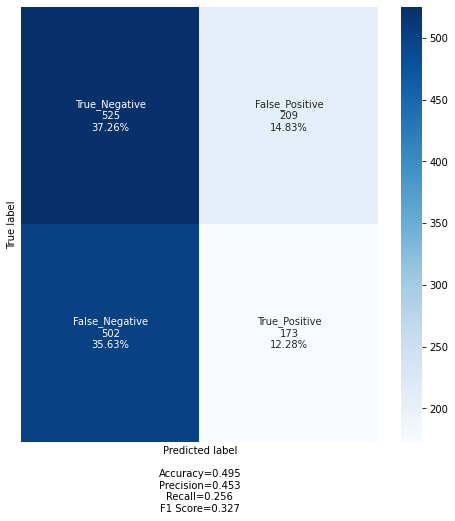

In [26]:
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories)

In [27]:
# Dicionário de parâmetros para o parameter tunning. Ao todo serão ajustados 2X15X5X5X7= 5.250 modelos. Contando com 10 folds no Cross-Validation, então são 52.500 modelos.
d_hiperparametros_DT= {"criterion": ["gini", "entropy"], 
                  "min_samples_split": [2, 5, 10, 30, 50, 70, 90, 120, 150, 180, 210, 240, 270, 350, 400],
                  "max_depth": [None, 2, 5, 9, 15],
                  "min_samples_leaf": [20, 40, 60, 80, 100],
                  "max_leaf_nodes": [None, 2, 3, 4, 5, 10, 15]}

Fitting 10 folds for each of 5250 candidates, totalling 52500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1778s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1221s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    6.7s
[Parallel(n_jo


Parametros otimizados: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 40, 'min_samples_split': 2}

DecisionTreeClassifier *********************************************************************************************************

********* CROSS-VALIDATION ***********
Média das Acurácias calculadas pelo CV....: 79.67999999999999
std médio das Acurácias calculadas pelo CV: 1.52

********* IMPORTÂNCIA DAS COLUNAS ***********
                 coluna  importancia
16          Contract_le     0.543419
10    OnlineSecurity_le     0.147008
2          TotalCharges     0.141521
9    InternetService_le     0.067006
0                tenure     0.051749
1        MonthlyCharges     0.042135
12  DeviceProtection_le     0.007162
5            Partner_le     0.000000
6         Dependents_le     0.000000
7       PhoneService_le     0.000000
8      MultipleLines_le     0.000000
4      SeniorCitizen_le     0.000000
11      OnlineBackup_le     0.000000
13       TechSupport_l

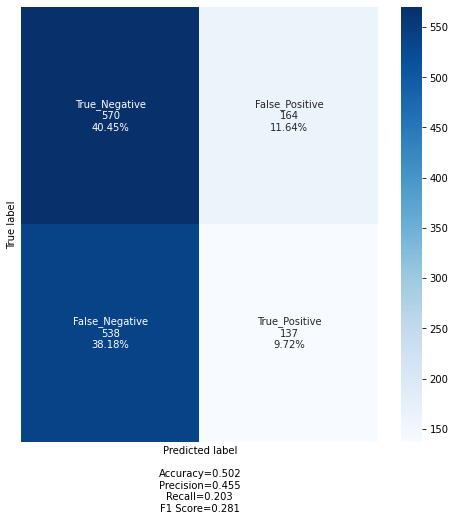

In [29]:
# Invoca a função GridSearchCV com o modelo baseline:
l_colunas = X_treinamento.columns
ml_DT2, best_params = GridSearchOptimizer(ml_DT, 'ml_DT2', d_hiperparametros_DT, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)


RANDOM FORESTER: X_treinamento_RF1, X_teste_RF1

(eliminação das colunas menos importantes conforme resultado da DT+GridSearchCV)

In [53]:
#Importância das colunas conforme Decision Tree ==> rodar RF eliminando demais colunas
#16          Contract_le     0.543419
#10    OnlineSecurity_le     0.147008
#2          TotalCharges     0.141521
#9    InternetService_le     0.067006
#0                tenure     0.051749
#1        MonthlyCharges     0.042135
#12  DeviceProtection_le     0.007162

In [38]:
X_teste.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_le',
       'SeniorCitizen_le', 'Partner_le', 'Dependents_le', 'PhoneService_le',
       'MultipleLines_le', 'InternetService_le', 'OnlineSecurity_le',
       'OnlineBackup_le', 'DeviceProtection_le', 'TechSupport_le',
       'StreamingTV_le', 'StreamingMovies_le', 'Contract_le',
       'PaperlessBilling_le', 'PaymentMethod_le'],
      dtype='object')

In [18]:
X_treinamento_RF1 = X_treinamento.drop(['gender_le','SeniorCitizen_le', 'Partner_le', 'Dependents_le',
                                    'PhoneService_le','MultipleLines_le','OnlineBackup_le','TechSupport_le',
                                    'StreamingTV_le', 'StreamingMovies_le','PaperlessBilling_le', 'PaymentMethod_le'],
                                   axis=1)

In [19]:
X_teste_RF1 = X_teste.drop(['gender_le','SeniorCitizen_le', 'Partner_le', 'Dependents_le',
                                    'PhoneService_le','MultipleLines_le','OnlineBackup_le','TechSupport_le',
                                    'StreamingTV_le', 'StreamingMovies_le','PaperlessBilling_le', 'PaymentMethod_le'],
                                   axis=1)

In [20]:
# RandomForestClassifier

# Instancia...
ml_RF= RandomForestClassifier(n_estimators=100, min_samples_split= 2, max_features="auto", random_state = i_Seed)

# Treina...
ml_RF.fit(X_treinamento_RF1, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20111974,
                       verbose=0, warm_start=False)

In [21]:
ml_RF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20111974,
                       verbose=0, warm_start=False)

In [22]:
# Chama a função do Cross-Validation:

a_scores_CV = funcao_cross_val_score(ml_RF, X_treinamento_RF1, y_treinamento, i_CV)

Média das Acurácias calculadas pelo CV....: 78.17
std médio das Acurácias calculadas pelo CV: 1.76


In [23]:
print(f'Acurácias: {a_scores_CV}')

Acurácias: [0.78014184 0.79432624 0.77304965 0.7429078  0.77442274 0.79573712
 0.77619893 0.77264654 0.80639432 0.80106572]


In [25]:
# Faz predições...
y_pred = ml_RF.predict(X_teste_RF1)

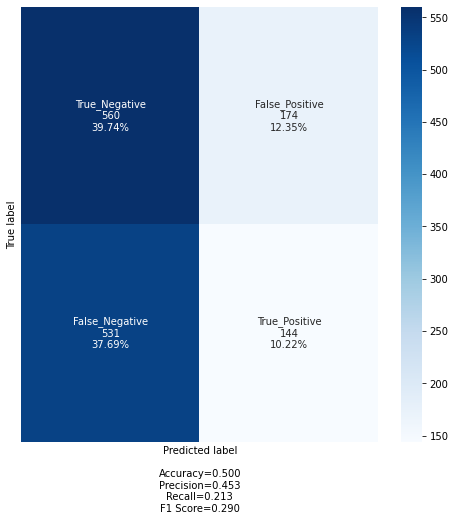

In [26]:
# Confusion Matrix
# chama a função confusion matrix:

cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative','False_Positive','False_Negative','True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories)

In [33]:
# Dicionário de parâmetros para o parameter tunning.
d_hiperparametros_RF= {'bootstrap': [True, False],
                  'max_depth': [10,None], #[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2,5],#[2, 5, 10],
                  'n_estimators': [200]} #[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [30]:
l_colunas = X_treinamento_RF1.columns
l_colunas

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_le',
       'OnlineSecurity_le', 'DeviceProtection_le', 'Contract_le'],
      dtype='object')

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1


Parametros otimizados: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

RandomForestClassifier *********************************************************************************************************

********* CROSS-VALIDATION ***********
Média das Acurácias calculadas pelo CV....: 79.84
std médio das Acurácias calculadas pelo CV: 1.46

********* IMPORTÂNCIA DAS COLUNAS ***********
                coluna  importancia
1       MonthlyCharges     0.201219
6          Contract_le     0.199572
2         TotalCharges     0.199463
0               tenure     0.180922
4    OnlineSecurity_le     0.108312
3   InternetService_le     0.068692
5  DeviceProtection_le     0.041820

********* CONFUSION MATRIX - PARAMETER TUNNING ***********


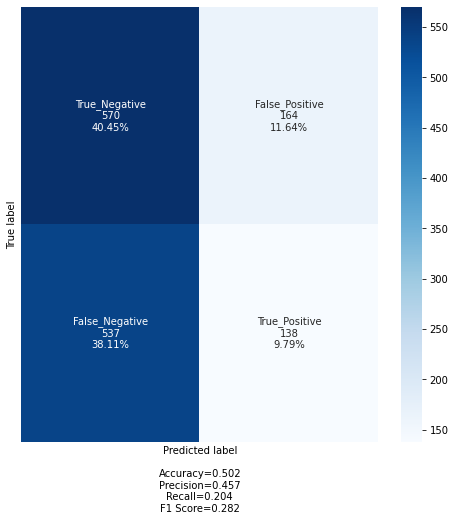

In [35]:
# Invoca a função do GridSearch

ml_RF2, best_params = GridSearchOptimizer(ml_RF, 'ml_RF2', d_hiperparametros_RF, X_treinamento_RF1, y_treinamento, X_teste_RF1, y_teste, i_CV, l_colunas)

## MODELO 2: RANDOM FOREST, CV e GridSearchRF (X_treinamento, X_teste)

Média das Acurácias calculadas pelo CV....: 79.86
std médio das Acurácias calculadas pelo CV: 1.97
Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2


Parametros otimizados: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

RandomForestClassifier *********************************************************************************************************

********* CROSS-VALIDATION ***********
Média das Acurácias calculadas pelo CV....: 80.58
std médio das Acurácias calculadas pelo CV: 1.6099999999999999

********* IMPORTÂNCIA DAS COLUNAS ***********
                coluna  importancia
2         TotalCharges     0.160752
0               tenure     0.148190
1       MonthlyCharges     0.144845
3   InternetService_le     0.018275
5  DeviceProtection_le     0.015132
4    OnlineSecurity_le     0.014542
6          Contract_le     0.011453

********* CONFUSION MATRIX - PARAMETER TUNNING ***********


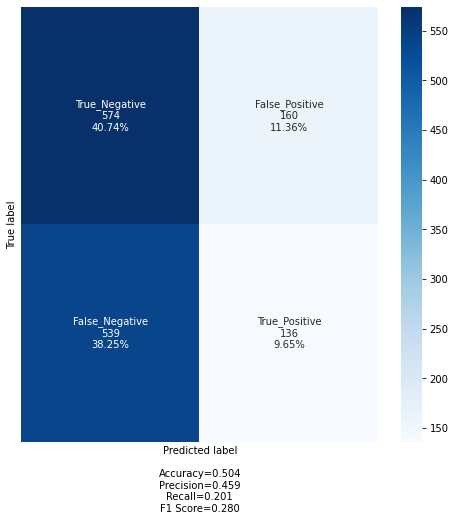

In [37]:
# RandomForestClassifier

# Instancia...
ml_RF= RandomForestClassifier(n_estimators=200, min_samples_split= 2, max_features="auto",random_state = i_Seed)

# Treina...
ml_RF.fit(X_treinamento, y_treinamento)

a_scores_CV = funcao_cross_val_score(ml_RF, X_treinamento, y_treinamento, i_CV)

# Faz predições...
y_pred = ml_RF.predict(X_teste)

# Dicionário de parâmetros para o parameter tunning.
d_hiperparametros_RF= {'bootstrap': [True, False],
                  'max_depth': [10,None],#[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2,5], #[2, 5, 10],
                  'n_estimators': [200,400]}#[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

ml_RF2, best_params = GridSearchOptimizer(ml_RF, 'ml_RF2', d_hiperparametros_RF, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)